# __DEEP LEARNING (DL)__

### What is Deep Learning?

- Deep learning is simply a neural network.
- These neural networks basically attempt to simulate the behaviour of the human brain. 
- Deep learning drives many artificial intelligence (AI) applications and services that improve automation, performing analytical and physical tasks without human intervention.
- It is capable of learning complex patterns and relationships within data.

#### Advanteges of Deep Learning:

1. High accuracy
2. Scalability
3. Flexibility
4. Continuous Improvement

#### Disadvantages of Deep Learning:

1. High computational power
2. Requires large amounts of data
3. Black box approach

### Artificial Neural Networks (ANNs)

- In a fully connected artificial neural network, there is an input layer, an output layer and one or more hidden layers.
- Each layer receives input from the previous layer, with the first layer receiving input from the outside world.
- Every connection between two layers has an associated weight that is assigned based on its importance.
- The network learns by adjusting the weights so that the output from the network is as close as possible to the expected output.

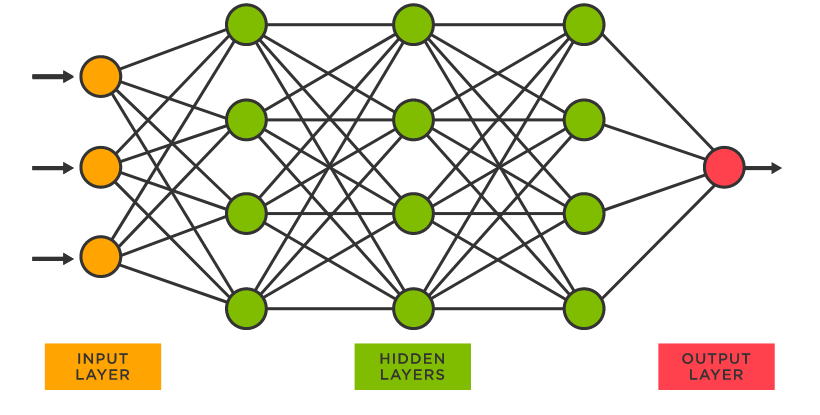

### TRAINING A NEURAL NETWORK

__Pytorch__ and __Tensorflow__ are the two most popular deep learning frameworks that you can use.

__First and foremost, we need to import the libraries that we will be using.__

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

- We will also need a dataset to work with.
- We will use Pima Indians onset of diabetes dataset.
- This dataset includes 8 input variables and 1 output variable (the last column).
- The variables are as follows:
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Diastolic blood pressure (mm Hg)
    4. Triceps skin fold thickness (mm)
    5. 2-Hour serum insulin (mu U/ml)
    6. Body mass index (weight in kg/(height in m)^2)
    7. Diabetes pedigree function
    8. Age (years)
- The output variable will be 1 if the patient has diabetes, and 0 if not. 
- So our neural network will have a binary classification task.

__Lets import our dataset.__

In [2]:
dataset = np.loadtxt('diabetes_train.csv', delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

- So we loaded our dataset but we need to convert it. 
- Reason behind this is that PyTorch operates on tensors.
- Tensors are multidimensional arrays that can be operated on by the GPU.

In [3]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)

- This is one way to import a dataset. There are other ways to import a dataset. 
- PyTorch has a lot of built-in datasets that you can use. You can also create your own dataset class.
- We will see how to import a built-in dataset in the next section.

__Now that we have our dataset ready, we can start building our neural network.__

In [4]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

We can see our model by printing it.

In [5]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


- After loading the dataset and creating our neural network, we need to prepare for training.
- We need to define our loss function and optimizer.
- Loss function is used to measure how well our model is performing.
- Optimizer is used to improve the performance of our model.
- We will use the cross entropy loss function and the Adam optimizer.
- There are other loss functions and optimizers that you can use.
- Here is a link to the loss functions that you can use: https://pytorch.org/docs/stable/nn.html#loss-functions
- Here is a link to the optimizers that you can use: https://pytorch.org/docs/stable/optim.html

In [6]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

- Now we can train our model. For training we need to set the number of epochs and the batch size.
- Epochs are the number of times that the model will see the whole dataset.
- Batch size is the number of samples that the model will see at each epoch.

In [7]:
epochs = 100
batch_size = 10

__Now we can write our training loop.__

In [8]:
for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        x_batch = X[i:i + batch_size]
        y_pred = model(x_batch)
        y_batch = Y[i:i + batch_size]

        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print('Epoch: {}/{} Loss: {:.6f}'.format(epoch, epochs, loss.item()))

Epoch: 0/100 Loss: 0.816943
Epoch: 10/100 Loss: 0.652161
Epoch: 20/100 Loss: 0.584659
Epoch: 30/100 Loss: 0.557777
Epoch: 40/100 Loss: 0.539821
Epoch: 50/100 Loss: 0.531671
Epoch: 60/100 Loss: 0.517443
Epoch: 70/100 Loss: 0.505330
Epoch: 80/100 Loss: 0.500159
Epoch: 90/100 Loss: 0.481711


- Important thing to look here is the drop in loss. __This means that our model is learning.__
- If the loss is not dropping, then there is something wrong with our model.

__Now that we train our model we need to evaluate it.__

In [9]:
with torch.no_grad():
    y_pred = model(X)

accuracy = (y_pred.round() == Y).float().mean()
print('Accuracy: {:.6f}'.format(accuracy.item()))

Accuracy: 0.752504


- We have roughly % accuracy on train set. This is not bad for a simple neural network.
- We can improve our model by adding more layers, changing the number of neurons, changing the activation functions, changing the loss function, changing the optimizer, changing the number of epochs, changing the batch size, etc.
- Now we need to test our model on the test set to see how well it performs on unseen data.

__Lets make a prediction for few patients in our test set.__

In [10]:
dataset = np.loadtxt('diabetes_test.csv', delimiter=',')
X_test = dataset[:, 0:8]
Y_test = dataset[:, 8]

X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1)

- You cannot use the same dataset for training and testing.
- For this reason we split our dataset into training and testing sets.
- We use the training set to train our model and the testing set to evaluate our model.

In [11]:
predictions = (model(X_test) > 0.5).int()

true_positives = (predictions == 1) & (Y_test == 1)
print('True positives: {}'.format(true_positives.sum()))
true_negatives = (predictions == 0) & (Y_test == 0)
print('True negatives: {}'.format(true_negatives.sum()))

print('Total test samples: {}'.format(len(Y_test)))

print('Accuracy: {:.6f}'.format((true_positives.sum() + true_negatives.sum()) / len(Y_test)))

True positives: 9
True negatives: 39
Total test samples: 69
Accuracy: 0.695652


__Having closer accuracy on train and test set means that our model is good.__

- There are also different type of neural networks that you can use:
    1. Feedforward neural network
    2. Convolutional neural network
    3. Recurrent neural network
    4. Generative adversarial network
    and more...

# __CONVOLUTIONAL NEURAL NETWORKS (CNN)__

#### CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series, and signal data.

- CNNs are made up of convolutional layers, pooling layers, and fully connected layers.
- Convolutional layers are the building blocks of CNNs.
- Pooling layers are used to reduce the dimensions of the feature maps.
- Fully connected layers (also called fully connected neural networks) are used to make predictions.
- For this point you don't need to worry about the details of these layers.


### Convolution Layer

- Convolution layer requires few things:
    1. Input data (image)
    2. Filter (kernel)
    3. Feature map (output)

Let's assume that we have a 5x5 pixel image. We will move our filter (3x3 kernel) across the image checking if the feature is present or not. This operation is called convolution. For more details you can check this link: https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

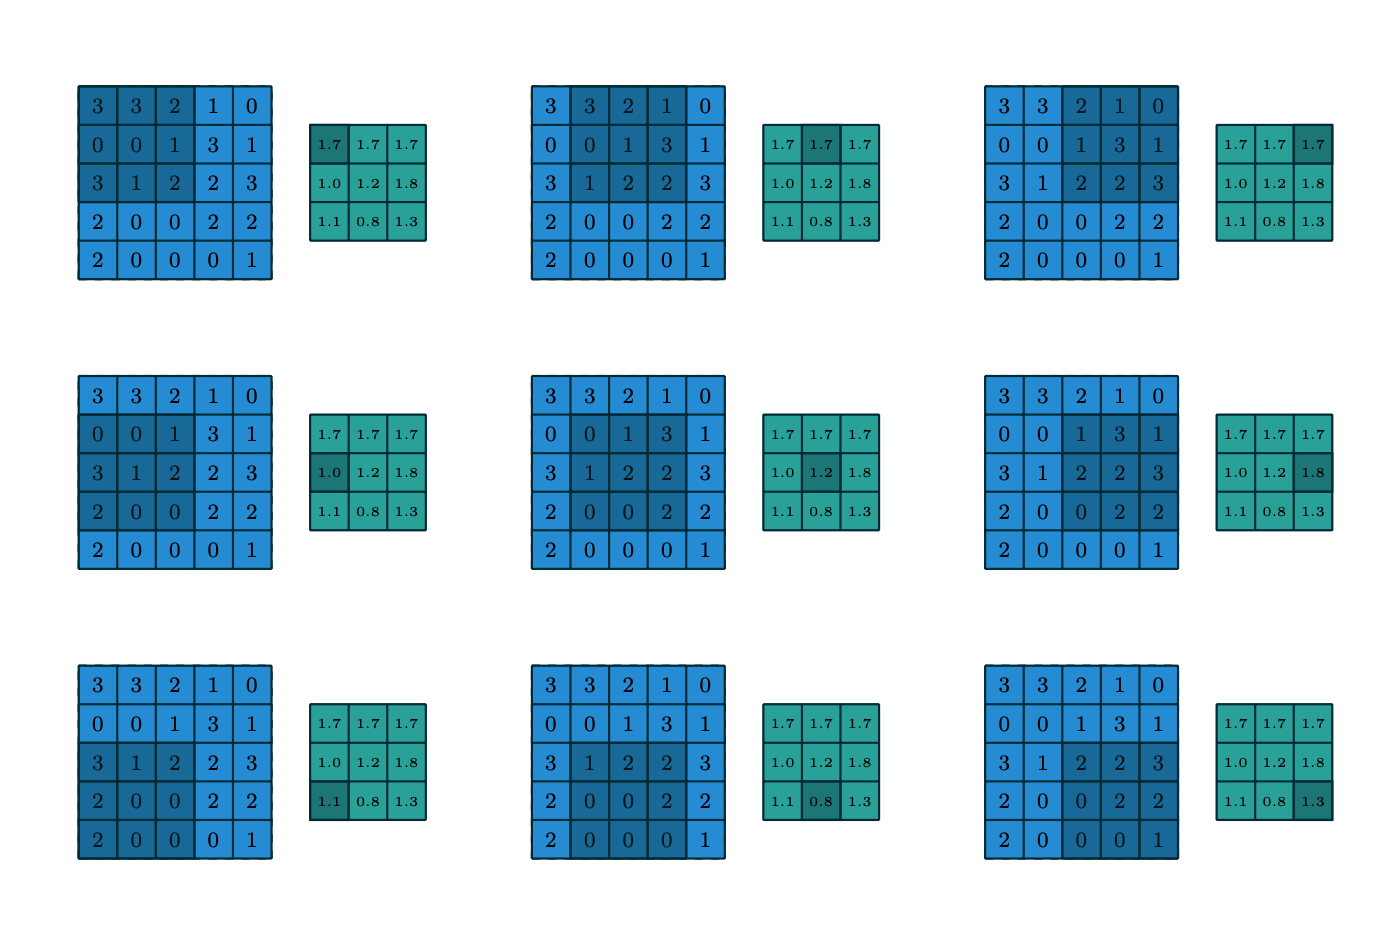

### Pooling Layer

Pooling layers, also known as downsampling, conducts dimensionality reduction, reducing the number of parameters in the input. 

- There are two main types of pooling layers:
    1. Average pooling
    2. Max pooling

### Fully Connected Layer (FC)

This layer performs the task of classification based on the features extracted through the previous layers and their different filters. It is a traditional multi-layer perceptron neural network layer.

- __As always we start with importing libraries__
- __We will also configure our device to use GPU if available.__

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet50

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

- __Now we need to import our dataset.__
- We will use the MNIST dataset.
- This dataset includes 28x28 grayscale images of handwritten digits (0 to 9).
- We will use this dataset to train our model to recognize handwritten digits.
- This dataset comes with training and testing sets so we don't need to split it.
- This time we also split our training set into training and validation sets.
- We will use the validation set to evaluate our model during training.

In [13]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='data',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data',
                                          train=False, 
                                          transform=transforms.ToTensor())

train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size, 
                                           shuffle=True)

validation_loader = torch.utils.data.DataLoader(dataset=val_set,
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)
print(f"Train size: {len(train_set)}, Test size: {len(test_dataset)}")

17.2%

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




99.4%

100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Train size: 50000, Test size: 10000


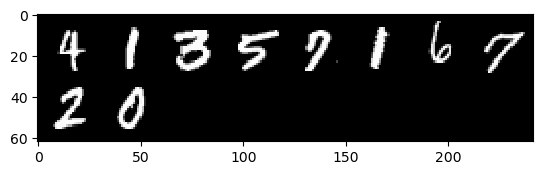

tensor([4, 1, 3, 5, 7, 1, 6, 7, 2, 0])


In [14]:
data_iter = iter(train_loader)

data = next(data_iter)
images, labels = data

grid_imgs = torchvision.utils.make_grid(images)
npimg = grid_imgs.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()
print(labels)

__Now we can build our model.__

In [15]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)

        return out

__Like we did before, we will set our epochs and batch size.__

In [16]:
num_epochs = 10
batch_size = 128

__We will also define our loss function and optimizer.__

In [17]:
model = ConvNet(10).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

__Now we can train our model.__

- What we did here is that we trained our model on the training set and evaluated it on the validation set.
- This means that we are not using the testing set yet.
- We will use the testing set after we are done with training and evaluating our model.
- We will validate our model after each epoch.

In [18]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    # Train
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    
    # Validation
    with torch.no_grad():
        model.eval()
        correct = 0
        total = 0
        for images, labels in validation_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print(f"Validation Accuracy of the model on the 10000 validation images: {100 * correct / total} ")

Epoch [1/10], Step [100/5000], Loss: 0.2574
Epoch [1/10], Step [200/5000], Loss: 0.3518
Epoch [1/10], Step [300/5000], Loss: 0.0256
Epoch [1/10], Step [400/5000], Loss: 0.0295
Epoch [1/10], Step [500/5000], Loss: 0.3006
Epoch [1/10], Step [600/5000], Loss: 0.1173
Epoch [1/10], Step [700/5000], Loss: 0.0026
Epoch [1/10], Step [800/5000], Loss: 0.0292
Epoch [1/10], Step [900/5000], Loss: 0.0087
Epoch [1/10], Step [1000/5000], Loss: 0.0238
Epoch [1/10], Step [1100/5000], Loss: 0.0784
Epoch [1/10], Step [1200/5000], Loss: 0.7233
Epoch [1/10], Step [1300/5000], Loss: 0.0198
Epoch [1/10], Step [1400/5000], Loss: 0.0096
Epoch [1/10], Step [1500/5000], Loss: 0.0142
Epoch [1/10], Step [1600/5000], Loss: 0.0071
Epoch [1/10], Step [1700/5000], Loss: 0.0022
Epoch [1/10], Step [1800/5000], Loss: 0.0051
Epoch [1/10], Step [1900/5000], Loss: 0.0627
Epoch [1/10], Step [2000/5000], Loss: 0.0061
Epoch [1/10], Step [2100/5000], Loss: 1.1862
Epoch [1/10], Step [2200/5000], Loss: 0.0254
Epoch [1/10], Step 

__Now we can evaluate our model on the testing set.__

In [19]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Test Accuracy of the model on the 10000 test images: {100 * correct / total} ")

Test Accuracy of the model on the 10000 test images: 98.85 


- As you can see our models accuracy on the testing set is very close to the accuracy on the validation set.
- This means that our model is ready to be used.